Decision tree classifier using the dataset

Import statements

In [27]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Importing the dataset

In [28]:
df = pd.read_csv("./CleanedData.csv", index_col=0)
columns = df.columns
print(df.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0      337.0        118.0                  4  4.5   4.5  9.65         1   
1      324.0        107.0                  4  4.0   4.5  8.87         1   
2      316.0        104.0                  3  3.0   3.5  8.00         1   
3      322.0        110.0                  3  3.5   2.5  8.67         1   
4      314.0        103.0                  2  2.0   3.0  8.21         0   

   SES Percentage  Asian  african american  latinx  white  Chance of Admit  
0              12      1                 0       0      0             0.92  
1              11      0                 0       1      0             0.76  
2              78      0                 0       1      0             0.72  
3              77      0                 0       0      1             0.80  
4               1      0                 1       0      0             0.65  


defining x

It is important to note that the features do not need to be scaled for DT or random forest classifiers.

In [29]:
x = df[columns[0:-1]]


Since decision trees are reliant on the fact that the classification is binary, I need to set a threshold for what
chance of admit means the student will be admitted.

In [30]:
median_value = df["Chance of Admit"].median()
print(median_value)

0.73


Since the median chance of admission is 73%, I will use that as the threshold. Any chance of admission >= 0.73 will be
set to one, and any student < 0.73 will be set to 0

In [31]:
for i in range(len(df["Chance of Admit"])):
    if df.loc[i, "Chance of Admit"] >= 0.73:
        df.loc[i, "Chance of Admit"] = 1
    else:
        df.loc[i, "Chance of Admit"] = 0
print(df["Chance of Admit"])

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
351    1.0
352    1.0
353    1.0
354    0.0
355    1.0
Name: Chance of Admit, Length: 356, dtype: float64


Defining y as the chance of admit column

In [32]:
y = df["Chance of Admit"]

split the data into training and testing

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, random_state=1)
print(x_train.head())
print(y_train.head())

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
23       300.0         97.0                  2  3.0   3.0  8.10         1   
320      338.0        115.0                  5  4.5   5.0  9.23         1   
213      328.0        110.0                  4  4.0   2.5  9.02         1   
51       307.0        101.0                  3  4.0   3.0  8.20         0   
92       301.0        107.0                  3  3.5   3.5  8.34         1   

     SES Percentage  Asian  african american  latinx  white  
23               93      0                 0       1      0  
320              19      0                 0       0      1  
213              15      0                 0       0      1  
51               94      0                 0       0      1  
92               52      0                 0       1      0  
23     0.0
320    1.0
213    1.0
51     0.0
92     0.0
Name: Chance of Admit, dtype: float64


Using grid search to find the correct hyperparameters

In [34]:
criteria = ["gini", "entropy"]
max_depths = [i for i in range(3, 11)]
min_samples_leaves = [i for i in range(1, 15)]

model_scores = []

for c in criteria:
    for depth in max_depths:
        for leaf_size in min_samples_leaves:
            model = DecisionTreeClassifier(criterion=c, max_depth=depth, min_samples_leaf=leaf_size)
            model.fit(x_train, y_train)
            score = model.score(x_test, y_test)
            model_scores.append(score)


            print("Criteria: " + c, "\nMax Depth: " + str(depth) + "\nMin Leaf Size: " + str(leaf_size) + "\nScore: " + str(score))
            print()

Criteria: gini 
Max Depth: 3
Min Leaf Size: 1
Score: 0.8314606741573034

Criteria: gini 
Max Depth: 3
Min Leaf Size: 2
Score: 0.8314606741573034

Criteria: gini 
Max Depth: 3
Min Leaf Size: 3
Score: 0.8314606741573034

Criteria: gini 
Max Depth: 3
Min Leaf Size: 4
Score: 0.8314606741573034

Criteria: gini 
Max Depth: 3
Min Leaf Size: 5
Score: 0.8314606741573034

Criteria: gini 
Max Depth: 3
Min Leaf Size: 6
Score: 0.8314606741573034

Criteria: gini 
Max Depth: 3
Min Leaf Size: 7
Score: 0.8202247191011236

Criteria: gini 
Max Depth: 3
Min Leaf Size: 8
Score: 0.8202247191011236

Criteria: gini 
Max Depth: 3
Min Leaf Size: 9
Score: 0.8202247191011236

Criteria: gini 
Max Depth: 3
Min Leaf Size: 10
Score: 0.8202247191011236

Criteria: gini 
Max Depth: 3
Min Leaf Size: 11
Score: 0.8089887640449438

Criteria: gini 
Max Depth: 3
Min Leaf Size: 12
Score: 0.8089887640449438

Criteria: gini 
Max Depth: 3
Min Leaf Size: 13
Score: 0.8089887640449438

Criteria: gini 
Max Depth: 3
Min Leaf Size: 14


Great, but that's hard to understand really well... Let me spit out some graphs. I think its fair to assume that, based
on the data above, the gini criteria works the best

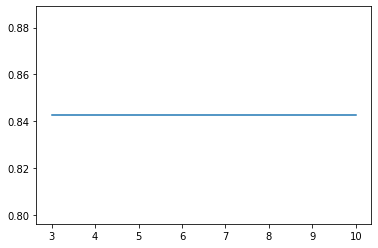

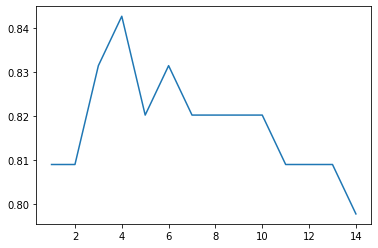

In [35]:
scores = []
for depth in max_depths:
    model = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=4)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores.append(score)

plt.plot(max_depths, scores)
plt.show()

scores = []
for leaf_size in min_samples_leaves:
    model = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=leaf_size)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores.append(score)

plt.plot(min_samples_leaves, scores)
plt.show()

We found that a tree with the Gini criteria and a max depth of 4 and leaf size of 4 gave us an score of 84%. In general,
however, the range of accuracy scores for almost every model in the grid search has been between 79% and 83% inclusive.
This means the decision tree is fairly robust against hyperparameter changes, especially the max depth – which in the
picture above is just a horizontal line.


We think we can do better. Now we will use the random forest to determine if that can provide better accuracy scores
than a standalone tree.

confirming the data is still intact

In [36]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
23       300.0         97.0                  2  3.0   3.0  8.10         1   
320      338.0        115.0                  5  4.5   5.0  9.23         1   
213      328.0        110.0                  4  4.0   2.5  9.02         1   
51       307.0        101.0                  3  4.0   3.0  8.20         0   
92       301.0        107.0                  3  3.5   3.5  8.34         1   
..         ...          ...                ...  ...   ...   ...       ...   
203      326.0        111.0                  5  4.5   4.0  9.23         1   
255      300.0        102.0                  2  1.5   2.0  7.87         0   
72       299.0         97.0                  3  5.0   3.5  7.66         0   
235      308.0        108.0                  4  4.5   5.0  8.34         0   
37       329.0        114.0                  5  4.0   5.0  9.30         1   

     SES Percentage  Asian  african american  latinx  white  
23           

We will now run grid search to determine the best hyperparameters for a random forest are.

In [37]:
n_ests = [i for i in range(50, 500, 50)]
criteria = ["gini", "entropy"]
scores = []

for n in n_ests:
    for c in criteria:
        model = RandomForestClassifier(criterion=c, n_estimators=n, bootstrap=True)
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        scores.append(score)
        features = model.feature_importances_
        print("Criteria: " + c +"\nNumber of trees: " + str(n) + "\nScore: " + str(score) + "\nFeatures: " + str(features))
        print()

Criteria: gini
Number of trees: 50
Score: 0.8202247191011236
Features: [0.26846365 0.13841366 0.07561607 0.10698763 0.06073247 0.19801235
 0.05153317 0.06985257 0.00304796 0.01049473 0.00542371 0.01142204]

Criteria: entropy
Number of trees: 50
Score: 0.8426966292134831
Features: [0.2164608  0.09615325 0.09811269 0.09496113 0.08385896 0.24165865
 0.06034703 0.08130471 0.00254278 0.01188103 0.00449817 0.0082208 ]

Criteria: gini
Number of trees: 100
Score: 0.8202247191011236
Features: [0.18519841 0.11556376 0.08027705 0.0949327  0.07410778 0.27524478
 0.08003391 0.06968231 0.00133184 0.00847909 0.00602307 0.00912531]

Criteria: entropy
Number of trees: 100
Score: 0.8314606741573034
Features: [0.19742019 0.1261064  0.0795053  0.10767642 0.07452221 0.24717115
 0.05760115 0.07344777 0.00259818 0.01382269 0.00452897 0.01559958]

Criteria: gini
Number of trees: 150
Score: 0.8202247191011236
Features: [0.20014596 0.12702746 0.07172564 0.11887377 0.07570645 0.23635732
 0.08018261 0.06202562 0.

Once again, let me plot these out.

[0.8202247191011236, 0.8202247191011236, 0.8202247191011236, 0.8202247191011236, 0.8202247191011236, 0.8202247191011236, 0.8314606741573034, 0.8089887640449438, 0.8089887640449438]
[0.8426966292134831, 0.8314606741573034, 0.8202247191011236, 0.8314606741573034, 0.8202247191011236, 0.8202247191011236, 0.8202247191011236, 0.8089887640449438, 0.8202247191011236]


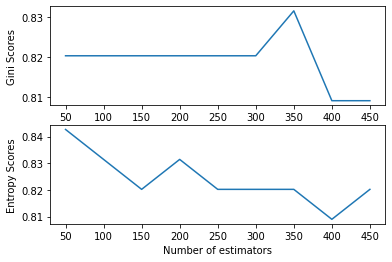

In [38]:
gini_scores = [scores[i] for i in range(0, len(scores), 2)]
entropy_scores = [scores[i] for i in range(1, len(scores), 2)]

print(gini_scores)
print(entropy_scores)

fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].plot(n_ests, gini_scores)
axs[0].set_ylabel("Gini Scores")
axs[1].plot(n_ests, entropy_scores)
axs[1].set_ylabel("Entropy Scores")
axs[1].set_xlabel("Number of estimators")
plt.show()



We found that the robustness of the model increased with random forest, meaning that the accuracy score was held between
80% and 83%. However, with the hyperparameters correct with the decision tree, we can achieve an accuracy higher than
the random forest. The robustness might be very conducive to using data such as this, though.

In rethinking the code I had written, I kept thinking of the way in which I split the y data. I used the median as the
threshold, but upon further thinking and research I decided there was likely not a better threshold to chose. Decision
trees should be split by the most information gain (i.e. the biggest determinant of which class the data will be in),
however, in this case, we are trying to determine if a kid will be accepted into a university. In the end, the data does
not matter as much as how well the models we are using can work with the data. In the future, it might be nice to talk
with the data engineers and tell them to collect data on whether or not the kid was actually admitted!
